In [1]:

# 導入必要的套件
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist

# 載入 MNIST 資料集
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


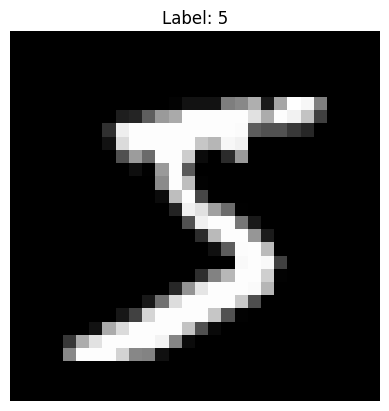

In [2]:
# 顯示單張圖像
plt.imshow(x_train[0], cmap='gray')
plt.title(f'Label: {y_train[0]}')
plt.axis('off')  # 隱藏座標軸
plt.show()
#train[0] train的第0張是5

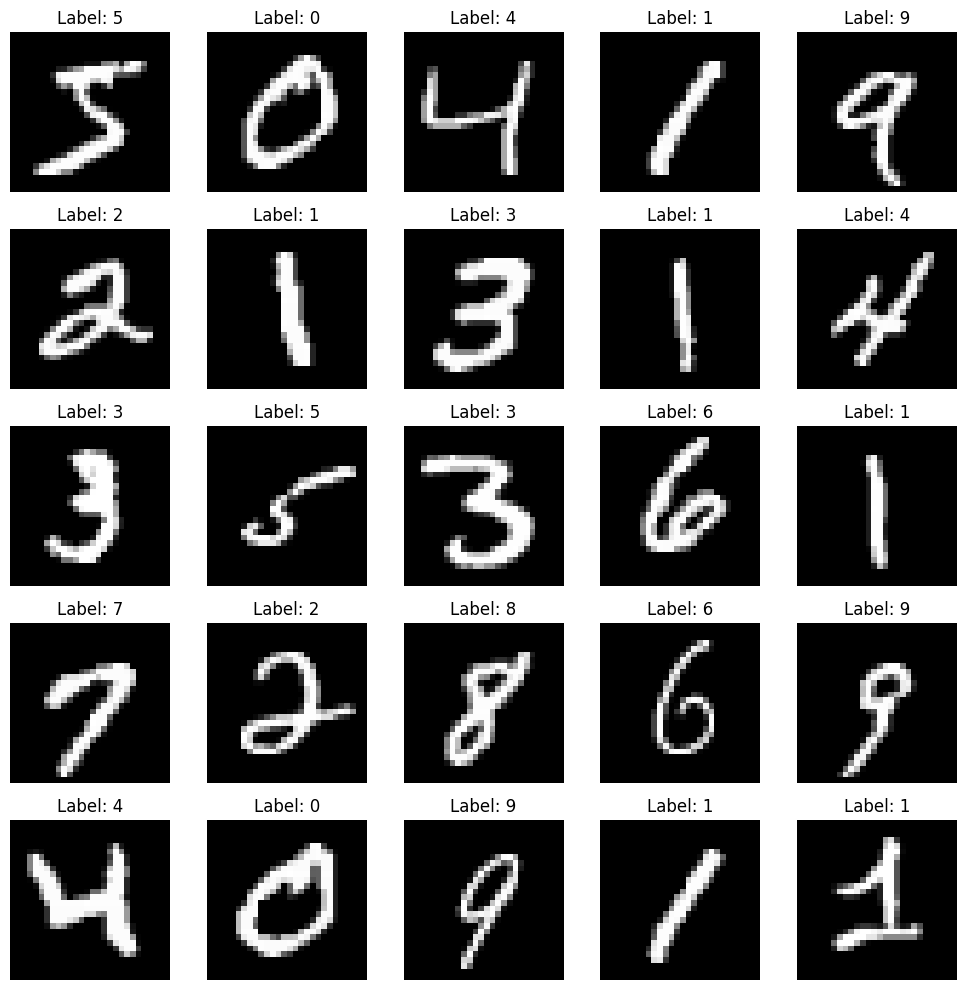

In [3]:
# 顯示多張圖像

plt.figure(figsize=(10, 10))  # 設置圖像大小
for i in range(25):  # 顯示前 25 張圖像
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.tight_layout()  # 自動調整子圖間的間距
plt.show()


# 輸入我們自己的圖片

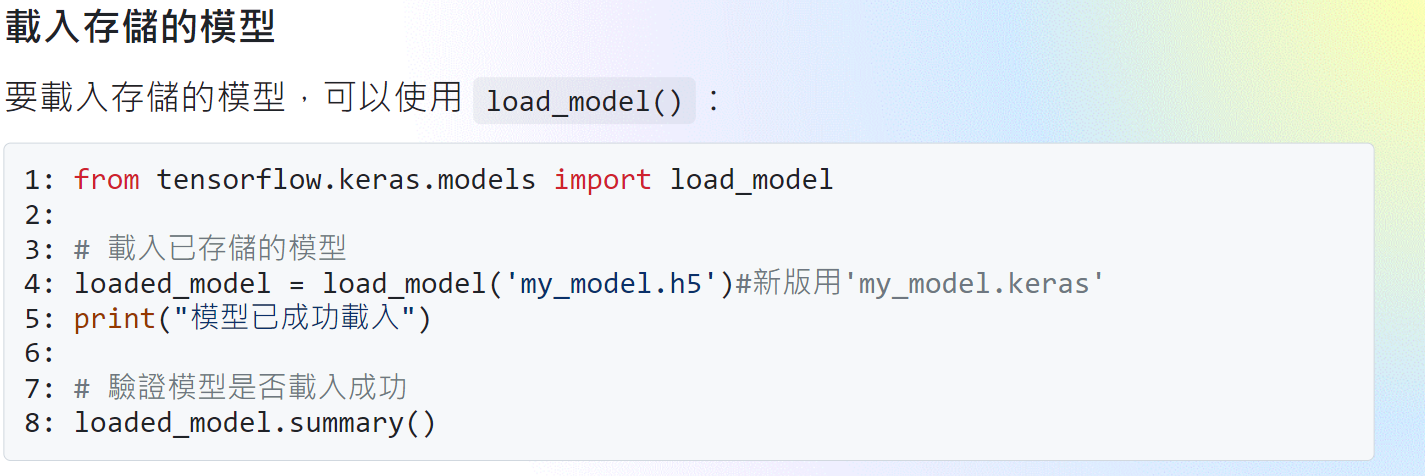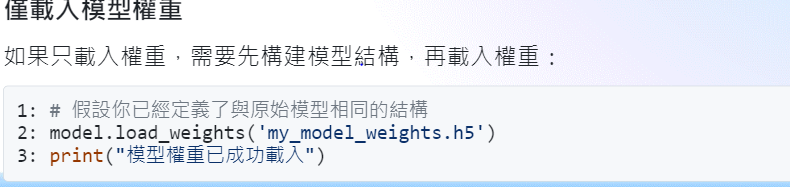

In [4]:

# 導入必要的套件

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model# 要先把先前訓練好的模組放上來

# 載入已存儲的模型
model = load_model('my_model.keras')


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 14 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


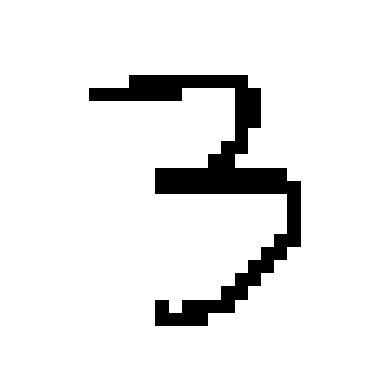

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
m3.png模型預測的數字是: 3


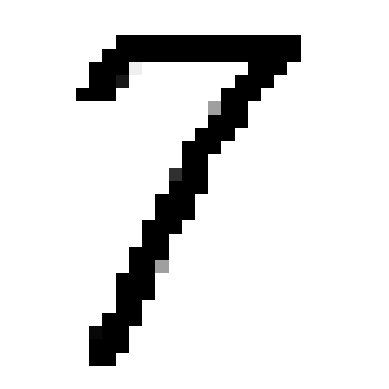

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
m7.png模型預測的數字是: 7


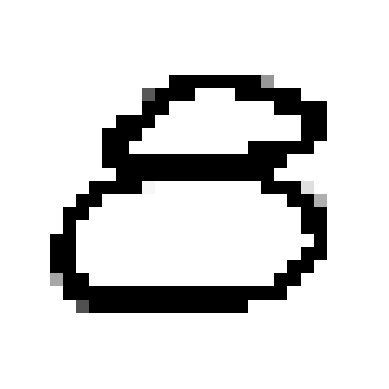

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
m8.png模型預測的數字是: 8


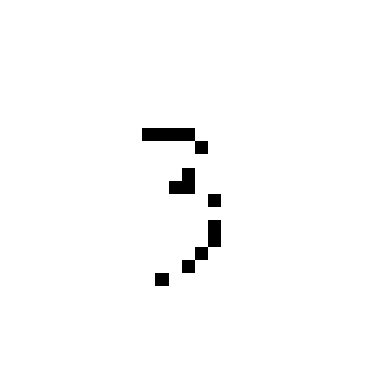

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
m3x.png模型預測的數字是: 8


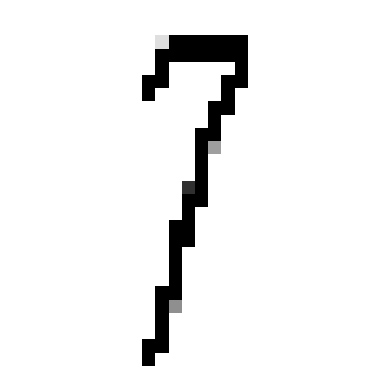

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
m7x.png模型預測的數字是: 4


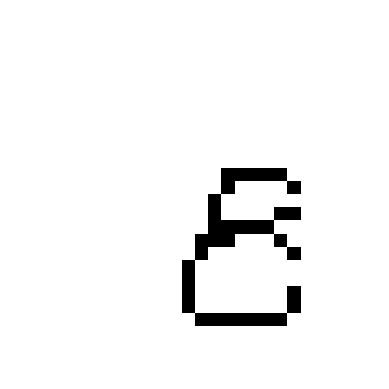

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
m8x.png模型預測的數字是: 6


In [5]:

pic_st = ['m3.png', 'm7.png', 'm8.png','m3x.png', 'm7x.png', 'm8x.png', ]#把自己帶的手寫數字放進去

for img_path in pic_st:
  # 輸入圖片並進行預處理
  # 載入圖片，將圖片轉為灰階並調整為 28x28 大小
  #img_path = 'm8.png'  # 你圖片的路徑
  img = image.load_img(img_path, color_mode='grayscale', target_size=(28, 28))

  # 將圖片轉換為數組格式
  img_array = image.img_to_array(img)

  # 顯示圖片
  plt.imshow(img_array.squeeze(), cmap='gray')
  plt.axis('off')
  plt.show()

  # 圖片預處理：標準化（將像素值縮放至 [0, 1]）
  img_array = img_array / 255.0

  # 增加一個維度以匹配模型輸入形狀（模型要求 (batch_size, height, width, channels)）
  img_array = np.expand_dims(img_array, axis=0)

  # 使用模型進行預測
  predictions = model.predict(img_array)

  # 獲取預測結果
  predicted_label = np.argmax(predictions)
  print(f'{img_path}模型預測的數字是: {predicted_label}')


為什麼後三張預測失敗

A:因為原圖白邊多+長寬比比較怪異，壓成數組時會比較模糊

# 定一下方格的位置

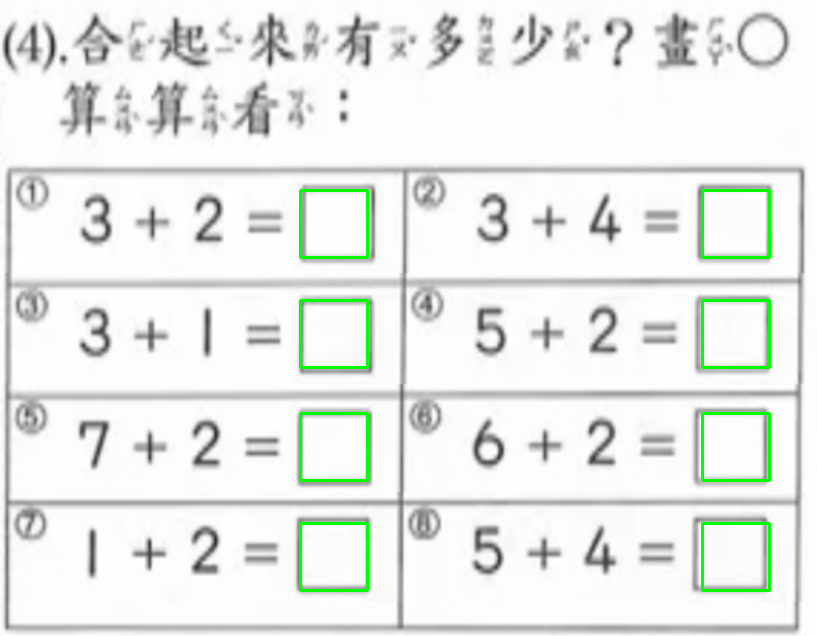

In [7]:
import cv2
import numpy as np

from google.colab.patches import cv2_imshow

# 讀取圖片
img = cv2.imread('image-4.png')

# 定義方格的起始座標和尺寸
width, height = 67, 67  # 寬和高

grid = [[300, 190],[702, 190],
     [300, 300],[702, 300],
     [300, 413],[702, 413],
     [300, 523],[702, 523],
]

for rec in grid:
    x,y = rec
    # 繪製方格
    cv2.rectangle(img, (x, y), (x+width, y+height), (0, 255, 0), 2)# 0 255 0 對應 R G B


# 顯示結果
#cv2.imshow('Image with Grid', img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

cv2_imshow(img)


In [8]:


def recognit(img):
  # 將圖片轉換為數組格式
  img_array = image.img_to_array(img)

  # 顯示圖片
  #plt.imshow(img_array.squeeze(), cmap='gray')
  #plt.axis('off')
  #plt.show()

  # 圖片預處理：標準化（將像素值縮放至 [0, 1]）
  img_array = img_array / 255.0

  # 增加一個維度以匹配模型輸入形狀（模型要求 (batch_size, height, width, channels)）
  img_array = np.expand_dims(img_array, axis=0)

  # 使用模型進行預測
  predictions = model.predict(img_array)

  # 獲取預測結果
  predicted_label = np.argmax(predictions)
  print(f'模型預測的數字是: {predicted_label}')
  return predicted_label

# 讀取圖片
img_name = 'image-5.png'
img = cv2.imread(img_name)

# 圖片正確答案
label_1 = [5,7,4,7,9,8,3,9]
label_2 = [1,7,4,7,7,7,9,6]

label = label_1 if img_name == 'image-5.png' else label_2
#1會出現圖片辨識的正確率
#2和用圖片辨識出來的結果看跟考試結果答案比的正確率
# 考試正確答案
ans = [5,7,4,7,9,8,3,9]
reced = []

# 定義方格的起始座標和尺寸
width, height = 60, 60  # 寬和高

grid = [[305, 190],[702, 190],
     [305, 300],[702, 300],
     [305, 413],[702, 413],
     [305, 523],[702, 523],
]#定義方格位置

for rec in grid:
    x,y = rec
    # 繪製方格
    #cv2.rectangle(img, (x, y), (x+width, y+height), (0, 255, 0), 2)
    cropped_img = img[y:y+height, x:x+width]
    gray = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)
    resized_img = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)

    cv2_imshow(resized_img)
    p = recognit(resized_img)
    reced.append(p)

print('圖片答案',label)
print('辦識結果',reced)
print('考卷正解',ans)

zipped_lists = zip(label, reced)#兩兩對應起來
# 判斷每個元組中的兩個元素是否相等，並將結果轉換為布林值
matches = sum(x == y for x, y in zipped_lists)
# 計算正確率
accuracy = matches / len(reced)
print(f"辦識正確率：{accuracy*100}%")

zipped_lists = zip(ans, reced)
matches = sum(x == y for x, y in zipped_lists)
accuracy = matches / len(reced)
print(f"考卷得分：{accuracy*100}%")

zipped_lists = zip(ans, label)
matches = sum(x == y for x, y in zipped_lists)
accuracy = matches / len(reced)
print(f"若辦識正確應得分：{accuracy*100}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
模型預測的數字是: 9


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
模型預測的數字是: 1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
模型預測的數字是: 4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
模型預測的數字是: 1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
模型預測的數字是: 2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
模型預測的數字是: 8


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
模型預測的數字是: 3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
模型預測的數字是: 4
圖片答案 [5, 7, 4, 7, 9, 8, 3, 9]
辦識結果 [9, 1, 4, 1, 2, 8, 3, 4]
考卷正解 [5, 7, 4, 7, 9, 8, 3, 9]
辦識正確率：37.5%
考卷得分：37.5%
若辦識正確應得分：100.0%


# 為什麼真實的資料結果那麼差？
 - 觀察一下是不是有什麼沒有注意到的地方？
 - 比較一下和訓練資料集抓出來的圖片是否有何不同！
 - 找到原因後，在下方修正看看！

 #為什麼兩張都有問題?

A:因為我們用白底黑字，但是原資料集是黑底白字
--->我們要改掉

In [10]:

def recognit(img):
  # 將圖片轉換為數組格式
  img_array = image.img_to_array(img)

  # 顯示圖片
  #plt.imshow(img_array.squeeze(), cmap='gray')
  #plt.axis('off')
  #plt.show()

  # 圖片預處理：標準化（將像素值縮放至 [0, 1]）
  img_array = img_array / 255.0

  # 增加一個維度以匹配模型輸入形狀（模型要求 (batch_size, height, width, channels)）
  img_array = np.expand_dims(img_array, axis=0)

  # 使用模型進行預測
  predictions = model.predict(img_array)

  # 獲取預測結果
  predicted_label = np.argmax(predictions)
  print(f'模型預測的數字是: {predicted_label}')
  return predicted_label

# 讀取圖片
img_name = 'image-5.png'
img = cv2.imread(img_name)

# 圖片正確答案
# 圖片正確答案
label_5 = [5,7,4,7,9,8,3,9]
label_6 = [1,7,4,7,7,7,9,6]
label_7 = [3,1,4,0,8,7,2,6]
label_8 = [0,9,8,7,8,3,4,2]
label_9 = [8,8,8,8,8,8,8,8]

#label = label_9
label = label_5 if img_name == 'image-5.png' else label_6

# 考試正確答案
ans = [5,7,4,7,9,8,3,9]
reced = []

# 定義方格的起始座標和尺寸
width, height = 60, 60  # 寬和高

grid = [[305, 190],[702, 190],
     [305, 300],[702, 300],
     [305, 413],[702, 413],
     [305, 523],[702, 523],
]

for rec in grid:
    x,y = rec
    # 繪製方格
    #cv2.rectangle(img, (x, y), (x+width, y+height), (0, 255, 0), 2)
    cropped_img = img[y:y+height, x:x+width]
    gray = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)
    resized_img = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)

 #   inverted_image = resized_img#(反轉後影像值=原本影像值) #修改這一行 ****** 要變成 反轉後影像值=255-原本影像值 才會變成黑底白字

    inverted_image = 255-resized_img
    cv2_imshow(inverted_image)
    p = recognit(inverted_image)
    reced.append(p)

print('圖片答案',label)
print('辦識結果',reced)
print('考卷正解',ans)

zipped_lists = zip(label, reced)
# 判斷每個元組中的兩個元素是否相等，並將結果轉換為布林值
matches = sum(x == y for x, y in zipped_lists)
# 計算正確率
accuracy = matches / len(reced)
print(f"辦識正確率：{accuracy*100}%")

zipped_lists = zip(ans, reced)
matches = sum(x == y for x, y in zipped_lists)
accuracy = matches / len(reced)
print(f"考卷得分：{accuracy*100}%")

zipped_lists = zip(ans, label)
matches = sum(x == y for x, y in zipped_lists)
accuracy = matches / len(reced)
print(f"若辦識正確應得分：{accuracy*100}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
模型預測的數字是: 5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
模型預測的數字是: 7


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
模型預測的數字是: 4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
模型預測的數字是: 7


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
模型預測的數字是: 9


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
模型預測的數字是: 8


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
模型預測的數字是: 3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
模型預測的數字是: 9
圖片答案 [5, 7, 4, 7, 9, 8, 3, 9]
辦識結果 [5, 7, 4, 7, 9, 8, 3, 9]
考卷正解 [5, 7, 4, 7, 9, 8, 3, 9]
辦識正確率：100.0%
考卷得分：100.0%
若辦識正確應得分：100.0%


In [13]:

def recognit(img):
  # 將圖片轉換為數組格式
  img_array = image.img_to_array(img)

  # 顯示圖片
  #plt.imshow(img_array.squeeze(), cmap='gray')
  #plt.axis('off')
  #plt.show()

  # 圖片預處理：標準化（將像素值縮放至 [0, 1]）
  img_array = img_array / 255.0

  # 增加一個維度以匹配模型輸入形狀（模型要求 (batch_size, height, width, channels)）
  img_array = np.expand_dims(img_array, axis=0)

  # 使用模型進行預測
  predictions = model.predict(img_array)

  # 獲取預測結果
  predicted_label = np.argmax(predictions)
  print(f'模型預測的數字是: {predicted_label}')
  return predicted_label

# 讀取圖片
img_name = 'image-6.png'
img = cv2.imread(img_name)

# 圖片正確答案
# 圖片正確答案
label_5 = [5,7,4,7,9,8,3,9]
label_6 = [1,7,4,7,7,7,9,6]
label_7 = [3,1,4,0,8,7,2,6]
label_8 = [0,9,8,7,8,3,4,2]
label_9 = [8,8,8,8,8,8,8,8]

#label = label_9
label = label_5 if img_name == 'image-5.png' else label_6

# 考試正確答案
ans = [5,7,4,7,9,8,3,9]
reced = []

# 定義方格的起始座標和尺寸
width, height = 60, 60  # 寬和高

grid = [[305, 190],[702, 190],
     [305, 300],[702, 300],
     [305, 413],[702, 413],
     [305, 523],[702, 523],
]

for rec in grid:
    x,y = rec
    # 繪製方格
    #cv2.rectangle(img, (x, y), (x+width, y+height), (0, 255, 0), 2)
    cropped_img = img[y:y+height, x:x+width]
    gray = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)
    resized_img = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)

 #   inverted_image = resized_img#(反轉後影像值=原本影像值) #修改這一行 ****** 要變成 反轉後影像值=255-原本影像值 才會變成黑底白字

    inverted_image = 255-resized_img
    cv2_imshow(inverted_image)
    p = recognit(inverted_image)
    reced.append(p)

print('圖片答案',label)
print('辦識結果',reced)
print('考卷正解',ans)

zipped_lists = zip(label, reced)
# 判斷每個元組中的兩個元素是否相等，並將結果轉換為布林值
matches = sum(x == y for x, y in zipped_lists)
# 計算正確率
accuracy = matches / len(reced)
print(f"辦識正確率：{accuracy*100}%")

zipped_lists = zip(ans, reced)
matches = sum(x == y for x, y in zipped_lists)
accuracy = matches / len(reced)
print(f"考卷得分：{accuracy*100}%")

zipped_lists = zip(ans, label)
matches = sum(x == y for x, y in zipped_lists)
accuracy = matches / len(reced)
print(f"若辦識正確應得分：{accuracy*100}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
模型預測的數字是: 7


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
模型預測的數字是: 7


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
模型預測的數字是: 0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
模型預測的數字是: 7


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
模型預測的數字是: 7


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
模型預測的數字是: 7


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
模型預測的數字是: 9


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
模型預測的數字是: 6
圖片答案 [1, 7, 4, 7, 7, 7, 9, 6]
辦識結果 [7, 7, 0, 7, 7, 7, 9, 6]
考卷正解 [5, 7, 4, 7, 9, 8, 3, 9]
辦識正確率：75.0%
考卷得分：25.0%
若辦識正確應得分：37.5%


# 修正後 `image-6.png` 還是有些問題
- 為什麼正確率還是不如訓練與測試好？

In [14]:
# 換這個看看？
model = load_model('my_model-2.keras') #為什麼這個就可以了？

In [15]:

def recognit(img):
  # 將圖片轉換為數組格式
  img_array = image.img_to_array(img)

  # 顯示圖片
  #plt.imshow(img_array.squeeze(), cmap='gray')
  #plt.axis('off')
  #plt.show()

  # 圖片預處理：標準化（將像素值縮放至 [0, 1]）
  img_array = img_array / 255.0

  # 增加一個維度以匹配模型輸入形狀（模型要求 (batch_size, height, width, channels)）
  img_array = np.expand_dims(img_array, axis=0)

  # 使用模型進行預測
  predictions = model.predict(img_array)

  # 獲取預測結果
  predicted_label = np.argmax(predictions)
  print(f'模型預測的數字是: {predicted_label}')
  return predicted_label

# 讀取圖片
img_name = 'image-6.png'
img = cv2.imread(img_name)

# 圖片正確答案
# 圖片正確答案
label_5 = [5,7,4,7,9,8,3,9]
label_6 = [1,7,4,7,7,7,9,6]
label_7 = [3,1,4,0,8,7,2,6]
label_8 = [0,9,8,7,8,3,4,2]
label_9 = [8,8,8,8,8,8,8,8]

#label = label_9
label = label_5 if img_name == 'image-5.png' else label_6

# 考試正確答案
ans = [5,7,4,7,9,8,3,9]
reced = []

# 定義方格的起始座標和尺寸
width, height = 60, 60  # 寬和高

grid = [[305, 190],[702, 190],
     [305, 300],[702, 300],
     [305, 413],[702, 413],
     [305, 523],[702, 523],
]

for rec in grid:
    x,y = rec
    # 繪製方格
    #cv2.rectangle(img, (x, y), (x+width, y+height), (0, 255, 0), 2)
    cropped_img = img[y:y+height, x:x+width]
    gray = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)
    resized_img = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)

 #   inverted_image = resized_img#(反轉後影像值=原本影像值) #修改這一行 ****** 要變成 反轉後影像值=255-原本影像值 才會變成黑底白字

    inverted_image = 255-resized_img
    cv2_imshow(inverted_image)
    p = recognit(inverted_image)
    reced.append(p)

print('圖片答案',label)
print('辦識結果',reced)
print('考卷正解',ans)

zipped_lists = zip(label, reced)
# 判斷每個元組中的兩個元素是否相等，並將結果轉換為布林值
matches = sum(x == y for x, y in zipped_lists)
# 計算正確率
accuracy = matches / len(reced)
print(f"辦識正確率：{accuracy*100}%")

zipped_lists = zip(ans, reced)
matches = sum(x == y for x, y in zipped_lists)
accuracy = matches / len(reced)
print(f"考卷得分：{accuracy*100}%")

zipped_lists = zip(ans, label)
matches = sum(x == y for x, y in zipped_lists)
accuracy = matches / len(reced)
print(f"若辦識正確應得分：{accuracy*100}%")


#這次就對了

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
模型預測的數字是: 1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
模型預測的數字是: 7


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
模型預測的數字是: 4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
模型預測的數字是: 7


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
模型預測的數字是: 7


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
模型預測的數字是: 7


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
模型預測的數字是: 9


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
模型預測的數字是: 6
圖片答案 [1, 7, 4, 7, 7, 7, 9, 6]
辦識結果 [1, 7, 4, 7, 7, 7, 9, 6]
考卷正解 [5, 7, 4, 7, 9, 8, 3, 9]
辦識正確率：100.0%
考卷得分：37.5%
若辦識正確應得分：37.5%


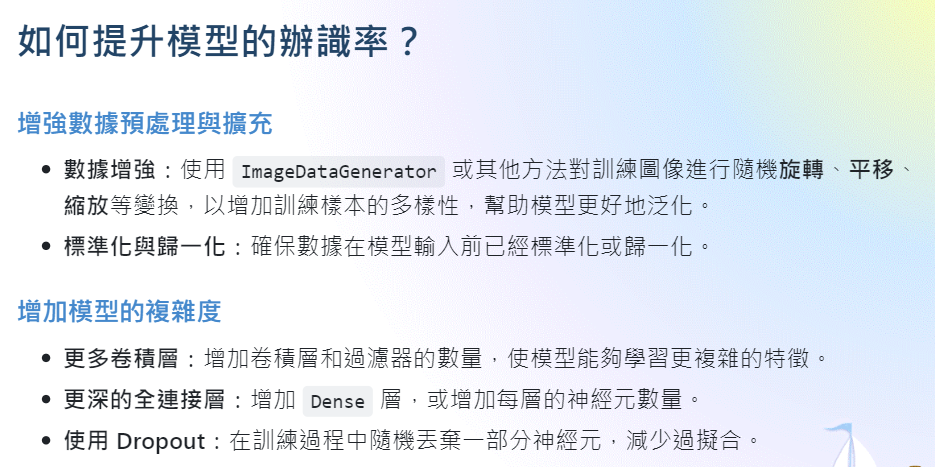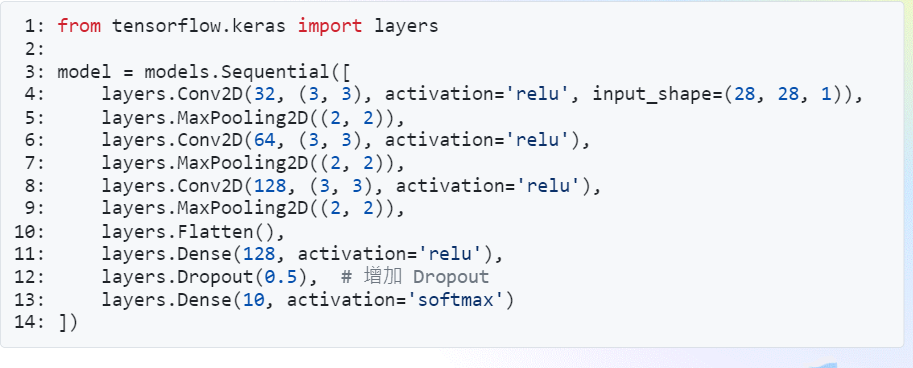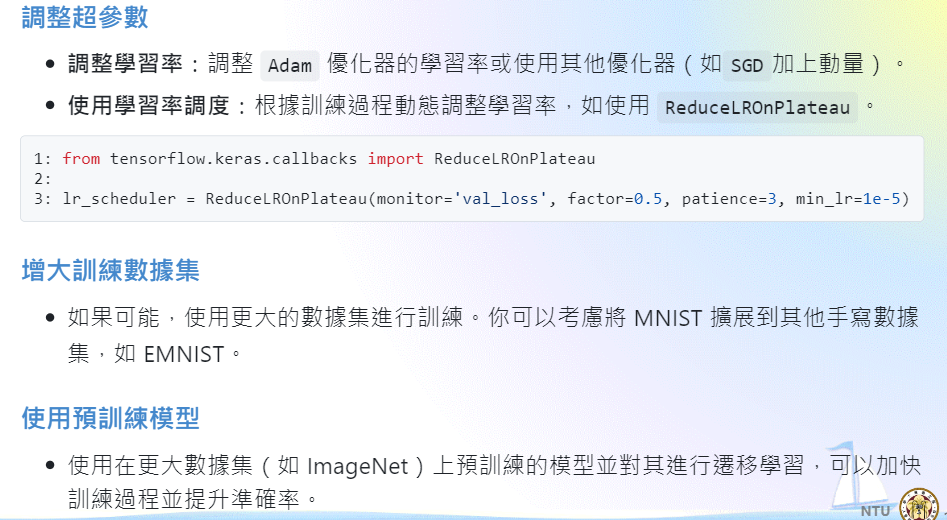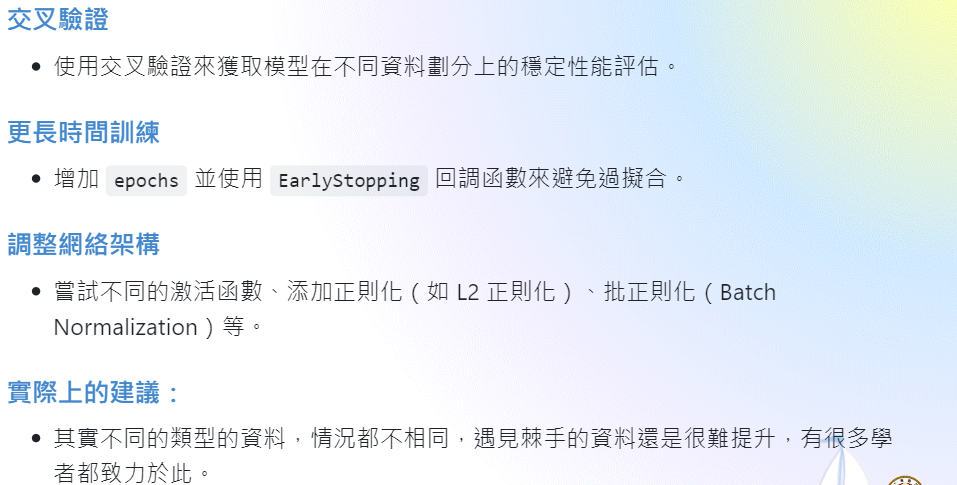